# Applications: Feature detection, feature extracrtion and in computer vision

In [1]:
import skimage.io
from skimage import color,data,io
from skimage.filters import roberts,sobel

import numpy
import matplotlib.pyplot as plt

In [2]:
mickey_image=skimage.io.imread("mickey-mouse-girl-friend-image-desktop.jpg")

In [7]:
Mickey_image=color.rgb2gray(mickey_image)

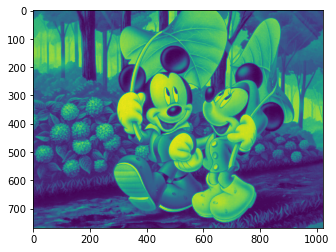

In [10]:
plt.imshow(Mickey_image)

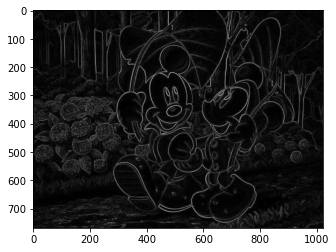

In [11]:
#Robert use first differentiator followed by taking gradient and applying some threshold 
roberst_image = roberts(Mickey_image)
plt.imshow(roberst_image,cmap="gray")

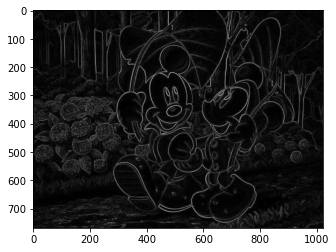

In [13]:
# Sobel use second degree dufferntiator and the process is same
sobel_image = sobel(Mickey_image)
plt.imshow(roberst_image,cmap="gray")

# The best detection algorithm: Canny detection

In [14]:
!pip install scipy-stack

    Running setup.py install for mpmath: started
    Running setup.py install for mpmath: finished with status 'done'


You should consider upgrading via the 'c:\users\htcuser.ctlt140\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [20]:
from scipy import ndimage as ndi  # For adding noise to image
from skimage.feature import canny
from skimage.draw import polygon
import numpy as np

In [21]:
sample_image = np.zeros((500,500),dtype=np.double)

In [24]:
poly = np.array(((200,100),
               (150,200),
               (150,300),
                (250,300),
               (30,200)))

rr,cc = polygon(poly[:,0],poly[:,1],sample_image.shape)
sample_image[rr,cc]=1

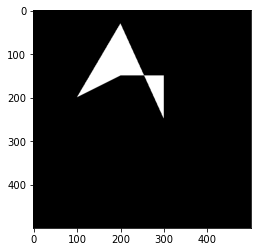

In [26]:
plt.imshow(sample_image,cmap="gray")

In [27]:
# To add noise 
im =ndi.gaussian_filter(sample_image,4)
im+=0.2*np.random.random(im.shape)

In [28]:
# To perform edge detection using canny fn
edges1= canny(im,sigma=1)
edges12= canny(im,sigma=1.3)
edges2= canny(im,sigma=1.7)

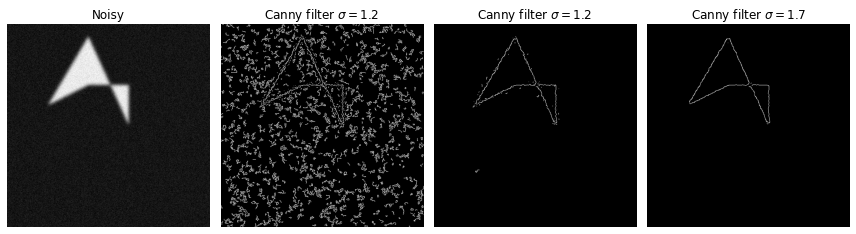

In [31]:
fig ,(ax0, ax1, ax2, ax3) = plt.subplots(1,4,figsize=(12,4),sharex=True,sharey=True)


ax0.imshow(im,cmap="gray")
ax0.axis('off')
ax0.set_title('Noisy')

ax1.imshow(edges1,cmap="gray")
ax1.axis('off')
ax1.set_title('Canny filter $\sigma=1.2$')
    
ax2.imshow(edges12,cmap="gray")
ax2.axis('off')
ax2.set_title('Canny filter $\sigma=1.2$')

ax3.imshow(edges2,cmap="gray")
ax3.axis('off')
ax3.set_title('Canny filter $\sigma=1.7$')

fig.tight_layout()
plt.show()